In [2]:
from sklearn import cluster, datasets
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import random
import module


#load iris data
iris = datasets.load_iris()
df=pd.DataFrame(iris.data,columns = iris.feature_names)

In [3]:
iris_generated = module.iris_data_generator(target_class='all',n_samples=10000)
iris_generated.head()

/home/philippe/Documents/Github/iris-data-generation/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/philippe/Documents/Github/iris-data-generation/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/philippe/Documents/Github/iris-data-generation/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.143470,3.559916,1.789354,0.476828,0.0
1,4.947573,3.257914,1.445426,0.227189,0.0
2,5.028126,3.346850,1.805352,0.532509,0.0
3,4.995992,3.598797,1.797901,0.476517,0.0
4,5.189209,3.355615,1.625729,0.625671,0.0


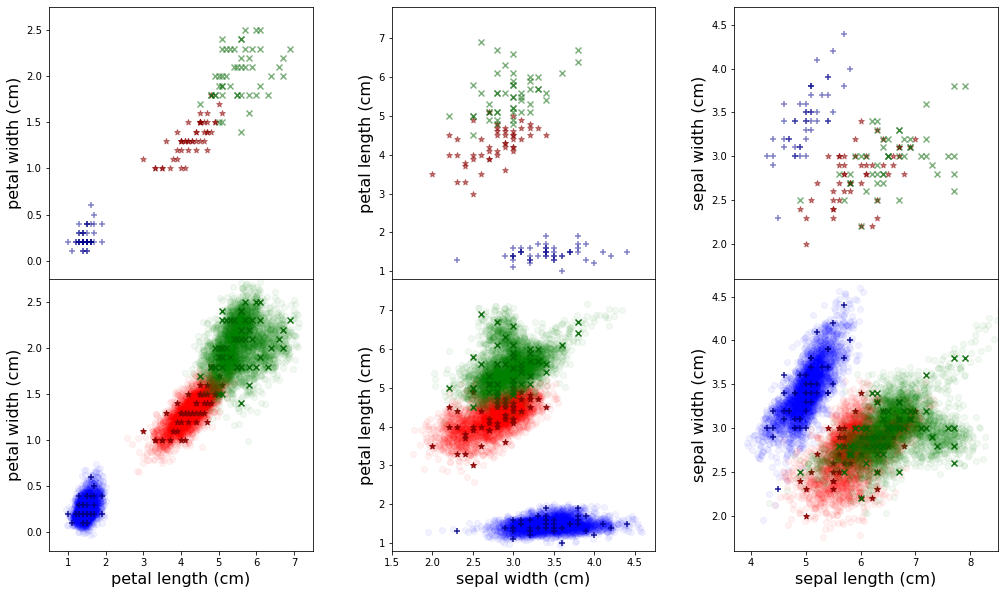

In [6]:
# Initialize plot
fig, axs = plt.subplots(2, 3, figsize=(17,10))

colors_samples = ['blue','red','green']
colors_iris = ['darkblue','darkred','darkgreen']
colors = ['navy', 'turquoise', 'darkorange','navy', 'turquoise', 'darkorange','navy', 'turquoise', 'darkorange']
markers = ['+','*','x','+','*','x','+','*','x','+','*','x']

for k in [0,1,2]:
  data = iris.data[iris.target == k]
  target_k = iris_generated['target'] == k

  axs[0, 0].scatter(data[:, 2], data[:, 3], marker=markers[k], color=colors_iris[k],alpha=0.5)
  axs[0, 0].set_xlim([0.5,7.5])
  axs[0, 0].set_ylim([-0.2,2.75])
  axs[0, 0].set_ylabel('petal width (cm)',size=16)
  axs[0, 0].set_xticklabels([])

  axs[0, 1].scatter(data[:, 1], data[:, 2], marker=markers[k], color=colors_iris[k],alpha=0.5)
  axs[0, 1].set_xlim([1.5,4.75])
  axs[0, 1].set_ylim([0.8,7.8])
  axs[0, 1].set_ylabel('petal length (cm)',size=16)
  axs[0, 1].set_xticklabels([])

  axs[0, 2].scatter(data[:, 0], data[:, 1], marker=markers[k], color=colors_iris[k],alpha=0.5)
  axs[0, 2].set_xlim([3.7,8.5])
  axs[0, 2].set_ylim([1.6,4.7])
  axs[0, 2].set_ylabel('sepal width (cm)',size=16)
  axs[0, 2].set_xticklabels([])


  axs[1, 0].scatter(iris_generated.to_numpy()[target_k, 2], iris_generated.to_numpy()[target_k, 3], marker='o',color=colors_samples[k],alpha=0.05)
  axs[1, 0].scatter(data[:, 2], data[:, 3], marker=markers[k], color=colors_iris[k],alpha=0.9)
  axs[1, 0].set_xlim([0.5,7.5])
  axs[1, 0].set_ylim([-0.2,2.75])
  axs[1, 0].set_xlabel('petal length (cm)',size=16)
  axs[1, 0].set_ylabel('petal width (cm)',size=16)

  axs[1, 1].scatter(iris_generated.to_numpy()[target_k, 1], iris_generated.to_numpy()[target_k, 2], marker='o',color=colors_samples[k],alpha=0.05)
  axs[1, 1].scatter(data[:, 1], data[:, 2], marker=markers[k], color=colors_iris[k],alpha=0.9)
  axs[1, 1].set_xlim([1.5,4.75])
  axs[1, 1].set_ylim([0.8,7.8])
  axs[1, 1].set_xlabel('sepal width (cm)',size=16)
  axs[1, 1].set_ylabel('petal length (cm)',size=16)

  axs[1, 2].scatter(iris_generated.to_numpy()[target_k, 0], iris_generated.to_numpy()[target_k, 1], marker='o',color=colors_samples[k],alpha=0.05)
  axs[1, 2].scatter(data[:, 0], data[:, 1], marker=markers[k], color=colors_iris[k],alpha=0.9)
  axs[1, 2].set_xlim([3.7,8.5])
  axs[1, 2].set_ylim([1.6,4.7])
  axs[1, 2].set_xlabel('sepal length (cm)',size=16)
  axs[1, 2].set_ylabel('sepal width (cm)',size=16)

  # axs[1, 0].scatter(iris_generated.to_numpy()[target_k, 0], iris_generated.to_numpy()[target_k, 2], marker='o',color=colors_samples[k],alpha=0.05)
  # axs[1, 0].scatter(data[:, 0], data[:, 2], marker=markers[k], color=colors_iris[k],alpha=0.9)

  # axs[1, 1].scatter(iris_generated.to_numpy()[target_k, 1], iris_generated.to_numpy()[target_k, 3], marker='o',color=colors_samples[k],alpha=0.05)
  # axs[1, 1].scatter(data[:, 1], data[:, 3], marker=markers[k], color=colors_iris[k],alpha=0.9)

  # axs[1, 2].scatter(iris_generated.to_numpy()[target_k, 0], iris_generated.to_numpy()[target_k, 3], marker='o',color=colors_samples[k],alpha=0.05)
  # axs[1, 2].scatter(data[:, 0], data[:, 3], marker=markers[k], color=colors_iris[k],alpha=0.9)

  #axs[1, 0].scatter(data[:, 2], data[:, 3], marker=markers[k],alpha=0.5)
  
# axs[1, 0].hist2d(iris_generated.to_numpy()[:, 2], iris_generated.to_numpy()[:, 3], bins=(50, 50), norm=mpl.colors.LogNorm(), cmin=0.1, cmap=plt.cm.Greys)
# axs[1, 1].hist2d(iris_generated.to_numpy()[:, 1], iris_generated.to_numpy()[:, 2], bins=(50, 50), norm=mpl.colors.LogNorm(), cmin=0.1, cmap=plt.cm.Greys)
# axs[1, 2].hist2d(iris_generated.to_numpy()[:, 0], iris_generated.to_numpy()[:, 1], bins=(50, 50), norm=mpl.colors.LogNorm(), cmin=0.1, cmap=plt.cm.Greys)


# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer() 
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0.3)
# plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

plt.show()

fig.savefig("./images/iris_generated.png",bbox_inches='tight')